<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/GM12878_nucleosome_calling_f3%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating the performance of SeATAC on calling nucleosomes on down-sampled GM12878



In [ ]:
start_time <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # required by R package ComplexHeatmap 

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

In [ ]:
system('apt-get install libmagick++-dev', intern = TRUE) # required by magick

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
  [5] "  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
  [6] "  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
  [7] "  libcupsfilters1 libcupsimage2 libdjvulibre-dev libdjvulibre-text"                                              

### Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools', 
  'dplyr', 'AUC',
  'BSgenome.Hsapiens.UCSC.hg19',
  'EnrichedHeatmap', 'magick', 'patchwork'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'AUC', 'BSgenome.Hsapiens.UCSC.hg19',
  'EnrichedHeatmap', 'magick', 'patchwork'

also installing the dependencies ‘formatR’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘lambda.r’, ‘futile.options’, ‘SummarizedExperiment’, ‘futile.logger’, ‘snow’, ‘BH’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XML’, ‘zlibbioc’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’, ‘bitops’, ‘BiocParallel’, ‘Rhtslib’, ‘iterators’, ‘BiocGenerics’, ‘S4Vectors’, ‘GenomeInfoDb’, ‘Biostrings’, ‘rtracklayer’, ‘XVector’, ‘Rsamtools’, ‘clue’, ‘GlobalOptions’, ‘png’, ‘foreach’, ‘doParallel’, ‘rjson’, ‘shape’, ‘BSgenome’, ‘ComplexHeatmap’, ‘GenomicRanges’, ‘matrixStats’, ‘GetoptLong’, ‘locfit’, ‘circlize’, ‘IRanges’


Old packages: 'crayon', 'fansi', 'gert', 'knitr', 

In [ ]:
library(devtools)

Loading required package: usethis



### Install SeATAC from github

In [ ]:
install_github('gongx030/seatac@v0.4.0', force = TRUE, quiet = FALSE)
reload(pkgload::inst("seatac"))
library(seatac)

crayon       (1.5.0 -> 1.5.1 ) [CRAN]
vctrs        (0.3.8 -> 0.4.0 ) [CRAN]
fansi        (1.0.2 -> 1.0.3 ) [CRAN]
magrittr     (2.0.2 -> 2.0.3 ) [CRAN]
tfautograph  (NA    -> 0.3.2 ) [CRAN]
processx     (3.5.2 -> 3.5.3 ) [CRAN]
config       (NA    -> 0.3.1 ) [CRAN]
here         (NA    -> 1.0.1 ) [CRAN]
RcppTOML     (NA    -> 0.1.7 ) [CRAN]
zeallot      (NA    -> 0.1.0 ) [CRAN]
tfruns       (NA    -> 1.5.0 ) [CRAN]
tensorflow   (NA    -> 2.8.0 ) [CRAN]
reticulate   (NA    -> 1.24  ) [CRAN]
caTools      (NA    -> 1.18.2) [CRAN]
gtools       (NA    -> 3.9.2 ) [CRAN]
keras        (NA    -> 2.8.0 ) [CRAN]
abind        (NA    -> 1.4-5 ) [CRAN]
gplots       (NA    -> 3.1.1 ) [CRAN]
tfdatasets   (NA    -> 2.7.0 ) [CRAN]
tfprobabi... (NA    -> 0.15.0) [CRAN]


Installing 20 packages: crayon, vctrs, fansi, magrittr, tfautograph, processx, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, caTools, gtools, keras, abind, gplots, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpxwT0hx/remotes5167d1d33d/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Load R packages

In [ ]:
library(GenomicRanges)
library(BSgenome.Hsapiens.UCSC.hg19)
library(dplyr)
library(ggplot2)
library(EnrichedHeatmap)
library(circlize)
library(magick)
library(AUC)
library(broom)
library(patchwork)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, u

### TensorFlow setup

In [ ]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [ ]:
Sys.time() - start_time

Time difference of 13.23803 mins

## Parameters

In [ ]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 10L,
  window_size = 1000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 10L,

  vae_num_peaks = 5000L,
  vae_latent = c(10L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,

  target_width = 100L,
  min_test_reads = 1L,
  max_test_reads = 10L,
  center_width = 100L # the center width
)

## Load full GM12878 ATAC-seq data

In [ ]:
remote_bam_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells.bam'
local_bam_file <- gsub('https://', './', remote_bam_file)
system(sprintf('wget -cx %s', remote_bam_file))
remote_bed_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_summits.bed'
local_bed_file <- gsub('https://', './', remote_bed_file)
system(sprintf('wget -cx %s', remote_bed_file))

## Read V-plots

In [ ]:
gr0 <- read.table(local_bed_file, header = FALSE, sep = '\t')
gr0 <- GRanges(seqnames = gr0[, 1], range = IRanges(gr0[, 2], gr0[, 3]))
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]
gr0 <- gr0 %>% resize(width = ARGS[['window_size']], fix = 'center')

In [ ]:
gr <- slidingWindows(gr0, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_file, genome = BSgenome.Hsapiens.UCSC.hg19,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells.bam



In [ ]:
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(local_bam_file)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()
x <- read_vplot(gr, filenames = local_bam_file, genome = BSgenome.Hsapiens.UCSC.hg19, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

number of training peaks for VaeModel: 4976

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells.bam



## Training VAE model for V-plots

As of 3/14/2022, Colab had errors on the first run. Run the cell again will resolve the issue.

In [ ]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
model <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 6667.2988406 | loss_reconstruction= 6666.2466071 | loss_kl=    1.0522262

epoch=     2/   200 | beta=1.000e+00 | loss= 5470.3257838 | loss_reconstruction= 5465.6021885 | loss_kl=    4.7236445

epoch=     3/   200 | beta=1.000e+00 | loss= 4815.7474334 | loss_reconstruction= 4811.6047801 | loss_kl=    4.1426403

epoch=     4/   200 | beta=1.000e+00 | loss= 3939.3656100 | loss_reconstruction= 3937.2444098 | loss_kl=    2.1212112

epoch=     5/   200 | beta=1.000e+00 | loss= 2765.0184545 | loss_reconstruction= 2764.0792581 | loss_kl=    0.9392007

epoch=     6/   200 | beta=1.000e+00 | loss= 1658.8798640 | loss_reconstruction= 1658.5440830 | loss_kl=    0.3357717

epoch=     7/   200 | beta=1.000e+00 | loss=  997.2902159 | loss_reconstruction=  997.0039516 | loss_kl=    0.2862593

epoch=     8/   200 | beta=1.000e+00 | loss=  706.4108918 | loss_reconstruction=  705.3230293 | loss_kl=    1.0878634

epoch=     9/   200 | beta=1.000e+00 | loss=  58

## Load the benchmark data on GM12878

In [ ]:
remote_benchmark_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_benchmark_block=640_step_size=10.rds'
local_benchmark_file <- gsub('https://', './', remote_benchmark_file)
sprintf('wget -cx %s', remote_benchmark_file) %>% system()

In [ ]:
gr <- readRDS(local_benchmark_file)
gr

GRanges object with 3170715 ranges and 2 metadata columns:
            seqnames              ranges strand | is_peak_at_center
               <Rle>           <IRanges>  <Rle> |         <logical>
        [1]     chr1          9670-10309      * |             FALSE
        [2]     chr1          9680-10319      * |             FALSE
        [3]     chr1          9690-10329      * |             FALSE
        [4]     chr1          9700-10339      * |             FALSE
        [5]     chr1          9710-10349      * |             FALSE
        ...      ...                 ...    ... .               ...
  [3170711]     chrX 155260009-155260648      * |             FALSE
  [3170712]     chrX 155260019-155260658      * |             FALSE
  [3170713]     chrX 155260029-155260668      * |             FALSE
  [3170714]     chrX 155260039-155260678      * |             FALSE
  [3170715]     chrX 155260049-155260688      * |             FALSE
            nucleoatac_score
                   <numeric>

In [ ]:
is_nucleosome <- which(gr$is_peak_at_center & gr$nucleoatac_score > 0.5)
set.seed(1)
is_not_nucleosome <- sample(which(!gr$is_peak_at_center & gr$nucleoatac_score < 0.01), length(is_nucleosome))
gr <- gr[c(is_nucleosome, is_not_nucleosome)]
mcols(gr)$is_nucleosome <- rep(c(TRUE, FALSE), c(length(is_nucleosome), length(is_not_nucleosome)))

In [ ]:
sprintf('# of nucleosomes (NOR): %d', length(is_nucleosome)) %>% message()
sprintf('# of NFR: %d', length(is_not_nucleosome)) %>% message()

# of nucleosomes (NOR): 5601

# of NFR: 5601



## Download the downsampled BAM files

In [ ]:
seeds <- 1:5
pcts <- c(0.001, 0.01, 0.1)
param <- expand.grid(seed = seeds, pct = pcts)
param <- param %>%
  mutate(remote_bam_file = sprintf('https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=%d_pct=%.4f.bam', seed, pct)) %>%
  mutate(local_bam_file = gsub('https://', './', remote_bam_file)) %>%
  mutate(remote_nucleoatac_file = gsub('.bam', '.nucleoatac_signal.smooth.bw', remote_bam_file)) %>% 
  mutate(local_nucleoatac_file = gsub('https://', './', remote_nucleoatac_file))

In [ ]:
for (i in 1:nrow(param)){
  system(sprintf('wget -x -c %s', param[i, 'remote_bam_file']))
}

In [ ]:
sprintf('# local BAM files: %d/%d', sum(file.exists(param$local_bam_file)), nrow(param)) %>% message()

# local BAM files: 15/15



## Download the downsampled NucleoATAC files

In [ ]:
for (i in 1:nrow(param)){
  system(sprintf('wget -cx %s', param[i, 'remote_nucleoatac_file']))
}

In [ ]:
sprintf('# local NucleoATAC files: %d/%d', sum(file.exists(param$local_nucleoatac_file)), nrow(param)) %>% message()

# local NucleoATAC files: 15/15



## Read the V-plot from down-sampled ATAC-seq

In [ ]:
x_test <- list()

In [ ]:
for (i in 1:nrow(param)){
  xi <- gr %>%
    read_vplot(
      param[i, 'local_bam_file'],
      genome = BSgenome.Hsapiens.UCSC.hg19,
      bin_size = ARGS[['bin_size']],
      fragment_size_range = c(0, ARGS[['fragment_size_range_max']]),
      fragment_size_interval = ARGS[['fragment_size_interval']]
    )
  ci <- rowSums(assays(xi, withDimnames = FALSE)$counts)
  xi <- xi[ci >= ARGS[['min_test_reads']]]
  sprintf('# of testing intervals that have at non-empty V-plot: %d', length(xi)) %>% message()
  x_test[[i]] <- xi
}

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=1_pct=0.0010.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=1_pct=0.0010.bam

# of testing intervals that have at non-empty V-plot: 1330

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=2_pct=0.0010.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=2_pct=0.0010.bam

# of testing intervals that have at non-empty V-plot: 1325

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=3_pct=0.0010.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_50k_cells_seed=3_pct=0.0010.bam

# of testing intervals that have at non-

## Get the nucleosome score from NucleoATAC

In [ ]:
is_center <- block_center(ARGS[['block_size']] / ARGS[['bin_size']]) 

In [ ]:
for (i in 1:nrow(param)){
  cvg <- rtracklayer::import(param[i, 'local_nucleoatac_file'], which = granges(x_test[[i]]), format = 'BigWig', as = 'RleList')
  rowData(x_test[[i]])$nucleoatac_score <- cvg[resize(granges(x_test[[i]]), fix = 'center', width = ARGS[['bin_size']] * sum(is_center))] %>% sum()
}

## Predict the nucleosome by SeATAC

In [ ]:
for (i in 1:nrow(param)){ 
  x_test[[i]] <- model %>% predict(x_test[[i]], batch_size =  ARGS[['vae_batch_size']], vplots = FALSE)
  rowData(x_test[[i]])$predicted_nucleosome_center <- rowData(x_test[[i]])$predicted_nucleosome[, 1, is_center] %>% rowMeans()
}

## Compute the ROC

In [ ]:
roc <- NULL
for (pct in c(0.1, 0.01, 0.001)){
  js <- which(param[, 'pct'] == pct)
  y_seatac <- unlist(lapply(js, function(j) rowData(x_test[[j]])$predicted_nucleosome_center))
  y_nucleoatac <- unlist(lapply(js, function(j) rowData(x_test[[j]])$nucleoatac_score))
  y <- unlist(lapply(js, function(j) rowData(x_test[[j]])$is_nucleosome)) %>% factor()
  roc <- rbind(roc, data.frame(group = pct, method = 'seatac', tidy(roc(y_seatac, y))))
  roc <- rbind(roc, data.frame(group = pct, method = 'nucleoatac', tidy(roc(y_nucleoatac, y))))
}

In [ ]:
roc %>%
  group_by(group, method) %>%
  summarize(auc = sum(tpr) / n())

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


group,method,auc
<dbl>,<chr>,<dbl>
0.001,nucleoatac,0.5032830
0.001,seatac,0.5977865
0.010,nucleoatac,0.4908465
0.010,seatac,0.6166790
0.100,nucleoatac,0.5910086
0.100,seatac,0.6662186


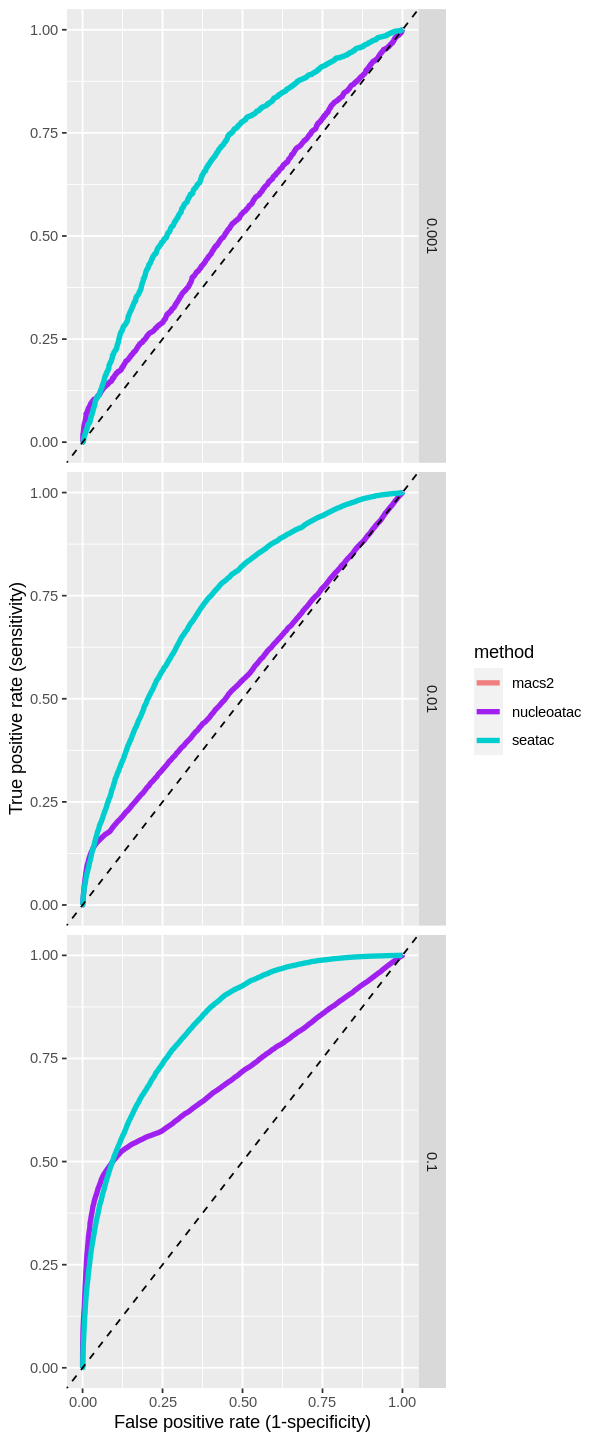

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 12)
roc %>% 
  ggplot(aes( x= fpr, y = tpr, color = method)) +
  #stat_smooth(method = "loess", span = 1, se = TRUE, aes(fill = method), alpha = 0.3) +
  geom_line(size = 1.5) +
  facet_grid(group ~ .) +
  xlab("False positive rate (1-specificity)") + 
  ylab("True positive rate (sensitivity)") +
  geom_abline(intercept = 0, slope = 1, linetype = 'dashed') + 
  scale_color_manual(values= c(macs2 = 'lightcoral', nucleoatac = 'purple', seatac = 'cyan3')) +
  scale_fill_manual(values= c(macs2 = 'lightcoral', nucleoatac = 'purple', seatac = 'cyan3'))

## Read V-plots of a single downsampled data

In [ ]:
select <- which(param$pct == 0.1 & param$seed == 1)
xi <- x_test[[select]]
xi

class: Vplots
dim: 11087 1 64 128
assays(1): counts
rowData(7): is_peak_at_center nucleoatac_score is_nucleosome vae_z_mean vae_z_stddev predicted_nucleosome predicted_nucleosome_center
dimdata:
grange: names(2): id sequence
sample: names(3): id filename name
interval: names(2): id center
bin: names(2): id position
## fragment_size_range:0,640
## fragment_size_interval:10
## bin_size:5
## window_size:640

In [ ]:
cvg <- list()

## Load the NucleoATAC results on the full data

In [ ]:
remote_nucleoatac_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Buenrostro_version=20170721a/GM12878_20170314b.nucleoatac_signal.smooth.bw'
system(sprintf('wget -x -c %s', remote_nucleoatac_file))
local_nucleoatac_file <- gsub('https://', './', remote_nucleoatac_file)

In [ ]:
cvg[['full_nucleoatac']] <- rtracklayer::import(local_nucleoatac_file, which = granges(xi), format = 'BigWig')

## Read the NucleoATAC results one down-sampled data

In [ ]:
cvg[['ds_nucleoatac']] <- rtracklayer::import(param[select, 'local_nucleoatac_file'], which = granges(xi), format = 'BigWig')

## Extract the SeATAC's nucleosome signal on down-sampled data

In [ ]:
cvg[['seatac']] <- slidingWindows(granges(xi), ARGS[['bin_size']], ARGS[['bin_size']]) %>%
  unlist()
cvg[['seatac']]$score <- c(t(rowData(xi)$predicted_nucleosome[, 1, ]))

## Read the MNase data

In [ ]:
remote_mnase_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Kundajie_version=20190802a/GSM920558_hg19_wgEncodeSydhNsomeGm12878Sig.bw'
system(sprintf('wget -x -c %s', remote_mnase_file))
local_mnase_file <- gsub('https://', './', remote_mnase_file)

In [ ]:
cvg[['mnase']] <- rtracklayer::import(local_mnase_file, which = granges(xi), format = 'BigWig')

## Prepare `noramlizedMatrix` for `EnrichedHeatmap`

In [ ]:
smooth <- FALSE
extend <- ARGS[['block_size']] / 2 - ARGS[['target_width']] / 2
target_ratio <- 1 / (2 * extend  / ARGS[['target_width']] + 1)
sprintf('target_ratio:%.3f', target_ratio) %>% message()

target_ratio:0.156



In [ ]:
mat <- lapply(cvg, function(cvgi){
  normalizeToMatrix(
    cvgi,
    resize(granges(xi), fix = 'center', width = ARGS[['target_width']]),
    extend = extend, 
    value_column = 'score', 
    mean_mode = 'w0', 
    w = 10, 
    smooth = smooth, 
    target_ratio = target_ratio
  )
})

## Heatmap comparison of the nucleosome regions

In [ ]:
group_cols <- c(
  'full_nucleoatac' = 'black',
  'ds_nucleoatac' = 'purple',
  'seatac' = 'cyan3',
  'mnase' = 'red'
)
col_fun <- lapply(names(cvg), function(i) colorRamp2(quantile(mat[[i]], c(0.005, 0.995)), c('white', group_cols[i])))
names(col_fun) <- names(cvg)

In [ ]:
z_seatac <- rowData(xi)$predicted_nucleosome[, 1, is_center] %>% rowMeans()
z_nucleoatac <- mat[['ds_nucleoatac']][, round(ncol(mat[['ds_nucleoatac']]) / 2)]

In [ ]:
seatac_nucleoatac <- z_seatac >= 0.5 & z_nucleoatac >= 0.2 & rowData(xi)$is_nucleosome
sprintf('number of nucleosomes called by both: %d', sum(seatac_nucleoatac)) %>% message()

number of nucleosomes called by both: 2042



In [ ]:
seatac_only <- z_seatac >= 0.5 & z_nucleoatac < 0.2 & rowData(xi)$is_nucleosome
sprintf('number of nucleosomes called by SeATAC only: %d', sum(seatac_only)) %>% message()

number of consistent windows: 3453



In [ ]:
nucleoatac_only <- z_seatac < 0.5 & z_nucleoatac >= 0.2 & rowData(xi)$is_nucleosome
sprintf('number of nucleosomes called by NucleoATAC only: %d', sum(nucleoatac_only)) %>% message()

number of nucleosomes called by NucleoATAC only: 22



In [ ]:
sp <- sprintf('%s_%s_%s', seatac_nucleoatac, seatac_only, nucleoatac_only)

In [ ]:
i <- seatac_nucleoatac | seatac_only
sprintf('total # of windows: %s', sum(i)) %>% message()

total # of windows: 5495



`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.



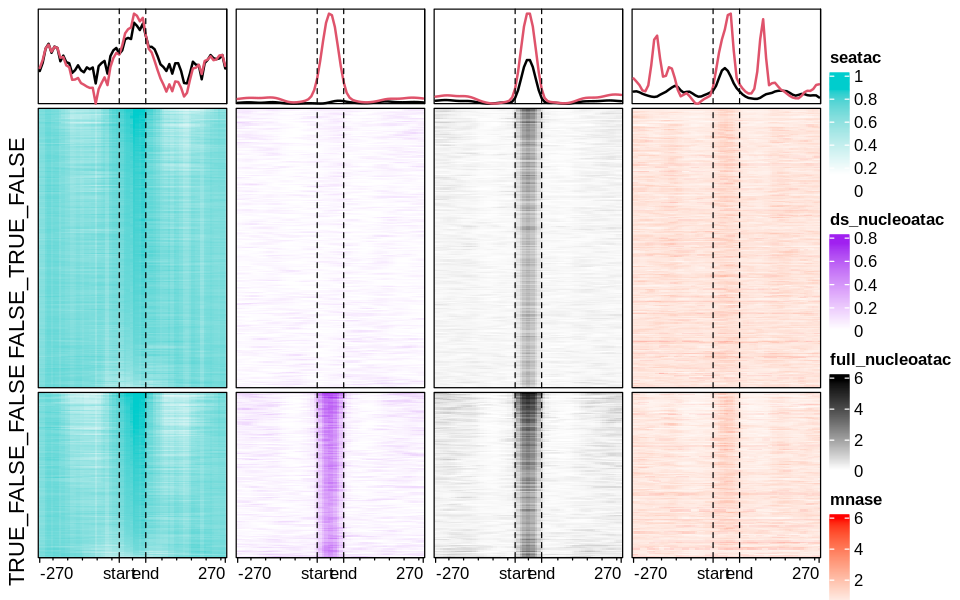

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 5)
ta <- HeatmapAnnotation(
  enriched = anno_enriched(
    gp = gpar(col = 1:2, lty = 1, lwd = 2),
    axis_param = list(facing = 'inside',at = -1000)
  )
)
EnrichedHeatmap(
  mat[['seatac']][i, ],
  col = col_fun[['seatac']],
  row_split = sp[i],
  top_annotation = ta,
  pos_line = TRUE,
  row_order = order(rowData(xi)$predicted_nucleosome[i, 1, is_center] %>% rowMeans(), decreasing = TRUE),
  name = 'seatac'
) + EnrichedHeatmap(
  mat[['ds_nucleoatac']][i, ],
  col = col_fun[['ds_nucleoatac']],
  pos_line = TRUE,
  top_annotation = ta,
  name = 'ds_nucleoatac'
) +
EnrichedHeatmap(
  mat[['full_nucleoatac']][i, ],
  col = col_fun[['full_nucleoatac']],
  pos_line = TRUE,
  top_annotation = ta,
  name = 'full_nucleoatac'
) + 
EnrichedHeatmap(
  mat[['mnase']][i, ],
  col = col_fun[['mnase']],
  pos_line = TRUE,
  top_annotation = ta,
  name = 'mnase'
)

## Generate the predicted Vplot

In [ ]:
xi <- model %>% predict(xi, batch_size =  ARGS[['vae_batch_size']], vplots = TRUE)

## Plot Vplots

In [ ]:
set.seed(50)
j <- sample(which(rowSums(assays(xi, withDimnames = FALSE)$counts) <= 5), 1L)
sprintf('%s:%d-%d', seqnames(xi)[j], start(xi)[j], end(xi)[j]) %>% message()
p1 <- vplot(xi[j])
p2 <- vplot(xi[j], 'predicted_counts')
p3 <- rbind(
  data.frame(
    method = 'seatac',
    nucleosome = rowData(xi)$predicted_nucleosome[j, 1, ] %>% scale01(),
    position = xi@dimdata$bin$position
  ),
  data.frame(
    method = 'ds_nucleoatac',
    nucleosome = coverage(cvg[['ds_nucleoatac']], weight = 'score')[granges(xi[j])] %>% as.matrix() %>% colMeans() %>% scale01(),
    position = 1:ARGS[['block_size']] - ARGS[['block_size']] / 2  
  ),
  data.frame(
    method = 'full_nucleoatac',
    nucleosome = coverage(cvg[['full_nucleoatac']], weight = 'score')[granges(xi[j])] %>% as.matrix() %>% colMeans() %>% scale01(),
    position = 1:ARGS[['block_size']] - ARGS[['block_size']] / 2  
  ),
  data.frame(
    method = 'mnase',
    nucleosome = coverage(cvg[['mnase']], weight = 'score')[granges(xi[j])] %>% as.matrix() %>% colMeans() %>% scale01(),
    position = 1:ARGS[['block_size']] - ARGS[['block_size']] / 2  
  )
) %>%
  ggplot(aes(x = position, y = nucleosome, col = method)) +
    geom_line(size = 1.5) +
    scale_color_manual(values=group_cols) +
    theme_bw() +
    scale_y_continuous(expand = c(0.01, 0.01)) +
    scale_x_continuous(breaks = c(-320, 0, 320), expand = c(0.01, 0.01))

chr7:107702968-107703607



Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


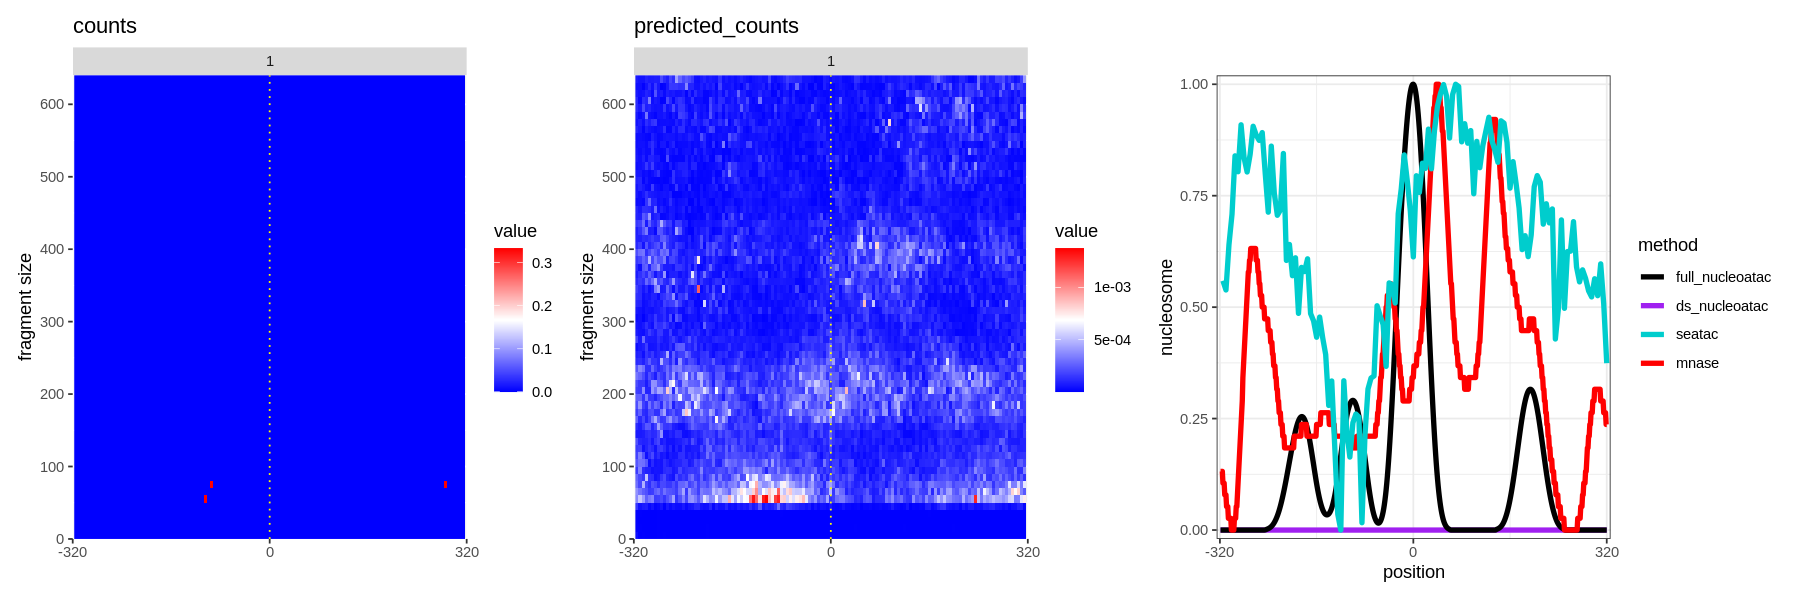

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 5)
p1 + p2 + p3

## SessionInfo

In [ ]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] patchwork_1.1.1                   broom_0.7.12                     
 [3] AUC_0.3.0                         magick_2.7.3                     
 [5] circlize_0.4.14                   EnrichedHeatmap_1.24.0           
 [7] ComplexHeatmap_2.10.0 

In [ ]:
Sys.time() - start_time

Time difference of 40.48063 mins